In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import math
from scipy import linalg, optimize
from scipy.signal import argrelextrema
from scipy.optimize.minpack import curve_fit



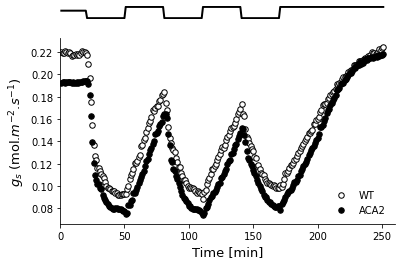

In [2]:
#reading the raw data file, deleting
df = pd.read_csv(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\LiCOR\Data\Analysed\Normalised\Normalised data.csv')


#Making the raw data figure
fig, axs = plt.subplots(2,1,figsize=(6,4), gridspec_kw={'height_ratios': [1, 15]}, sharex=True)


#Calculating the mean of all ACA2
df['ACA average'] = df[['P3','P5nor','P6','P7','P8']].mean(axis=1)

df['WT_average'] = df[['WT1','WT#7 fer']].mean(axis=1)


#print(df)




#OBS instead of changing the name in all cells below I am just naming the average WT1

df['WT1']=df["WT_average"]



#plotting the raw data

axs[0].axis("off")

axs[0].plot(df['Time [m]'],df['Qin'], "k", linewidth=2)


axs[1].scatter(df['Time [m]'],df['WT1'], s=30, color="white", edgecolor="black",  label="WT")
axs[1].scatter(df['Time [m]'], df['ACA average'], s=30, color="black",  label="ACA2")


axs[1].set_ylabel("$g_{s}$ (mol.$m^{-2}$.$s^{-1}$)", size=13)
axs[1].set_xlabel("Time [min]", size=13)

axs[1].set_xlim(0,260)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)





plt.legend(frameon=False)

#plt.savefig('Graphs/12_01_2022_rawdata.png', dpi=400)


    Time [m]  ACA average  time1
22      23.0     0.181525    0.0
23      24.0     0.162406    1.0
24      25.0     0.139714    2.0
25      26.0     0.120417    3.0
26      27.0     0.109670    4.0
27      28.0     0.105525    5.0
28      29.0     0.101710    6.0
29      30.0     0.101871    7.0
30      31.0     0.097848    8.0
31      32.0     0.097229    9.0
32      33.0     0.092169   10.0
33      34.0     0.089203   11.0
34      35.0     0.087888   12.0
35      36.0     0.085502   13.0
36      37.0     0.083967   14.0
37      38.0     0.081825   15.0
38      39.0     0.080773   16.0
39      40.0     0.080278   17.0
40      41.0     0.079669   18.0
41      42.0     0.079239   19.0
42      43.0     0.080178   20.0
43      44.0     0.079853   21.0
44      45.0     0.079619   22.0
45      46.0     0.079135   23.0
46      47.0     0.079033   24.0
47      48.0     0.078810   25.0
48      49.0     0.077458   26.0
49      50.0     0.077703   27.0
a1= 0.10029162322496098 b1 = 0.249838231388

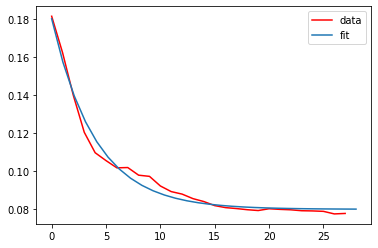

In [3]:
#Fitting the first closing

open1 = df[(df["Time [m]"] > 22) & (df['Time [m]']<=50)][["Time [m]","ACA average"]]

#adding a column with new values from 0

open1['time1'] = open1['Time [m]'] - open1.iat[0,0]

print(open1)



#define the function
def decay(x,a,b,c):
    return ((a)*np.exp(-b*x)) + c



#initial guessing
p0 = [0.2, 0.3, 0.08] # this is an mandatory initial guess

#fititng the curve
popt1, pcov1 = curve_fit(decay, open1['time1'], open1['ACA average'], p0)



#Printing pop1 values
print("a1=",popt1[0], "b1 =", popt1[1], "c1 =" , popt1[2])



#print(exp1)


fig2 = plt.figure()
ax2=fig2.add_subplot(1,1,1)

#plotting data

ax2.plot(open1['time1'], open1['ACA average'], color='r', label="data")


#plotting line of best fit
fit1x = np.linspace(0, 28, 28)
fit1y = decay(fit1x, *popt1)

print(popt1)

ax2.plot(fit1x,fit1y, label='fit')

plt.legend(loc='best')

# Getting sums of squares and R squared
residuals1 = open1['ACA average']- decay(open1['time1'], *popt1)
ss_res1 = np.sum(residuals1**2)

ss_tot1 = np.sum((open1['ACA average']-np.mean(open1['ACA average']))**2)

r_squared1 = 1 - (ss_res1 / ss_tot1)
          
            

     Time [m]  ACA average  time2
82       83.0     0.160702    0.0
83       84.0     0.146424    1.0
84       85.0     0.136643    2.0
85       86.0     0.123364    3.0
86       87.0     0.121173    4.0
87       88.0     0.115611    5.0
88       89.0     0.113665    6.0
89       90.0     0.109317    7.0
90       91.0     0.106524    8.0
91       92.0     0.102629    9.0
92       93.0     0.098975   10.0
93       94.0     0.095370   11.0
94       95.0     0.092112   12.0
95       96.0     0.089659   13.0
96       97.0     0.088566   14.0
97       98.0     0.086150   15.0
98       99.0     0.085162   16.0
99      100.0     0.081770   17.0
100     101.0     0.081791   18.0
101     102.0     0.079926   19.0
102     103.0     0.079657   20.0
103     104.0     0.079540   21.0
104     105.0     0.079232   22.0
105     106.0     0.079023   23.0
106     107.0     0.078743   24.0
107     108.0     0.078422   25.0
108     109.0     0.077187   26.0
109     110.0     0.076035   27.0
0.082041263919

'\n\n# for local maxima\nargrelextrema(np_obs2, np.greater)\n\n# for local minima\nargrelextrema(np_obs2, np.less)\nnp_obs2[argrelextrema(np_obs2, np.greater)[0]]\nnp_obs2[argrelextrema(np_obs2, np.less)[0]]\n\n'

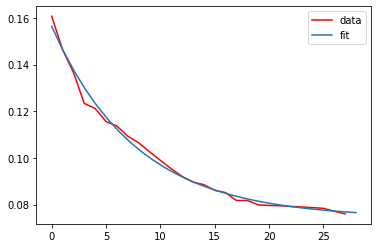

In [4]:
#Fitting the second closing



open2 = df[(df["Time [m]"] > 82) & (df['Time [m]']<=110)][["Time [m]","ACA average"]]

#adding a column with new values from 0-72
open2['time2'] = open2['Time [m]'] - open2.iat[0,0]

print(open2)


popt2, pcov2 = curve_fit(decay, open2['time2'], open2['ACA average'])

#making figure to check the fit

fig3 = plt.figure()
ax3=fig3.add_subplot(1,1,1)
                         

ax3.plot(open2['time2'], open2['ACA average'], color='r', label="data")

fit2x = np.linspace(0, 28, 28)
fit2y = decay(fit2x, *popt2)


ax3.plot(fit2x, fit2y, label='fit')

plt.legend(loc='best')


print(popt2[0])



# Getting sums of squares and R squared
residuals2 = open2['ACA average']- decay(open2['time2'], *popt2)
ss_res2 = np.sum(residuals2**2)

ss_tot2 = np.sum((open2['ACA average']-np.mean(open2['ACA average']))**2)

r_squared2 = 1 - (ss_res2 / ss_tot2)

"""

# for local maxima
argrelextrema(np_obs2, np.greater)

# for local minima
argrelextrema(np_obs2, np.less)
np_obs2[argrelextrema(np_obs2, np.greater)[0]]
np_obs2[argrelextrema(np_obs2, np.less)[0]]

"""

     Time [m]  ACA average  time3
142     143.0     0.146097    0.0
143     144.0     0.139738    1.0
144     145.0     0.131365    2.0
145     146.0     0.124986    3.0
146     147.0     0.123242    4.0
147     148.0     0.120169    5.0
148     149.0     0.117840    6.0
149     150.0     0.114321    7.0
150     151.0     0.111647    8.0
151     152.0     0.109153    9.0
152     153.0     0.105391   10.0
153     154.0     0.102402   11.0
154     155.0     0.099965   12.0
155     156.0     0.097614   13.0
156     157.0     0.095369   14.0
157     158.0     0.091764   15.0
158     159.0     0.090490   16.0
159     160.0     0.089698   17.0
160     161.0     0.087840   18.0
161     162.0     0.085910   19.0
162     163.0     0.085401   20.0
163     164.0     0.083764   21.0
164     165.0     0.082803   22.0
165     166.0     0.081828   23.0
166     167.0     0.081024   24.0
167     168.0     0.081271   25.0
168     169.0     0.081654   26.0
169     170.0     0.081716   27.0
0.100291623224

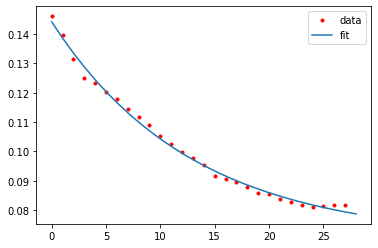

In [5]:
#This box makes the datafile open3, which is the third opening




open3 = df[(df["Time [m]"] > 142) & (df['Time [m]']<=170)][["Time [m]","ACA average"]]



#adding a column with new values from 0-72
open3['time3'] = open3['Time [m]'] - open3.iat[0,0]


print(open3)


#fitting decay curve


popt3, pcov3 = curve_fit(decay, open3['time3'], open3['ACA average'])




#make figure to check the fit

fig4 = plt.figure()
ax4=fig4.add_subplot(1,1,1)

ax4.plot(open3['time3'], open3['ACA average'], ".", color='r', label="data")


#extrapolate using the new values
fit3x = np.linspace(0, 28, 28)
fit3y = decay(fit3x, *popt3)


ax4.plot(fit3x, fit3y, label='fit')

plt.legend(loc='best')


print(popt1[0])


# Getting sums of squares and R squared
residuals3 = open3['ACA average']- decay(open3['time3'], *popt3)
ss_res3 = np.sum(residuals3**2)

ss_tot3 = np.sum((open3['ACA average']-np.mean(open3['ACA average']))**2)

r_squared3 = 1 - (ss_res3 / ss_tot3)






b3 = 0.0738936598499454
b2 = 0.08204126391968042
b1 = 0.24983823138847933
r_squared 3 =  0.9945148214540335
r_squared 2 = 0.9923904909592725
r_squared 1 = 0.9850670762637128


[Text(0, 0.5, "Total conductcance (g' $umol^{-1}$ $m^{-2}$ $s^{-1}$)"),
 Text(0.5, 0, 'Time (min)')]

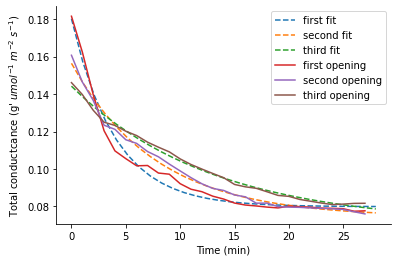

In [6]:
#plotting the ACA closings together


fig5 = plt.figure()
ax5=fig5.add_subplot(1,1,1)

ax5.plot(fit1x, fit1y,"--", label="first fit" )
ax5.plot(fit2x, fit2y, "--", label="second fit")
ax5.plot(fit3x, fit3y, "--", label="third fit")
ax5.plot(open1['time1'], open1['ACA average'], label="first opening")
ax5.plot(open2['time2'], open2['ACA average'],label="second opening")
ax5.plot(open3['time3'], open3['ACA average'], label="third opening")

plt.legend()

print("b3 =", popt3[0])
print("b2 =", popt2[0])
print("b1 =", popt1[1])

b3 = popt3[0]
b2 = popt2 [0]
b1 = popt1 [1]

print("r_squared 3 = ", r_squared3)

print("r_squared 2 =", r_squared2)
print("r_squared 1 =", r_squared1)

#################### 


ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

ax5.set(
 ylabel= "Total conductcance (g' $umol^{-1}$ $m^{-2}$ $s^{-1}$)", xlabel= "Time (min)")


    Time [m]       WT1  time1
22      23.0  0.196461    0.0
23      24.0  0.175408    1.0
24      25.0  0.154556    2.0
25      26.0  0.136452    3.0
26      27.0  0.127067    4.0
27      28.0  0.123367    5.0
28      29.0  0.116355    6.0
29      30.0  0.116307    7.0
30      31.0  0.113204    8.0
31      32.0  0.110911    9.0
32      33.0  0.109071   10.0
33      34.0  0.107165   11.0
34      35.0  0.103434   12.0
35      36.0  0.100024   13.0
36      37.0  0.098124   14.0
37      38.0  0.098176   15.0
38      39.0  0.097653   16.0
39      40.0  0.095385   17.0
40      41.0  0.095670   18.0
41      42.0  0.095225   19.0
42      43.0  0.094010   20.0
43      44.0  0.093609   21.0
44      45.0  0.092319   22.0
45      46.0  0.092022   23.0
46      47.0  0.092152   24.0
47      48.0  0.092556   25.0
48      49.0  0.093212   26.0
49      50.0  0.093178   27.0
a1= 0.0992673785395544 b1 = 0.2350188842046762 c1 = 0.09427773047876638
0.9862221686396176


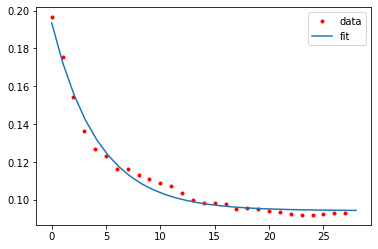

In [7]:
# this box fits the WT first closing



#extracting the data we want

WTopen1 = df[(df["Time [m]"] > 22) & (df['Time [m]']<=50)][["Time [m]","WT1"]]

#adding a column with new values from 0

WTopen1['time1'] = WTopen1['Time [m]'] - WTopen1.iat[0,0]


print(WTopen1)


#initial guessing
p0 = [0.2, 0.25, 0.08] # this is an initial guess

#fititng the curve
WTpopt1, WTpcov1 = curve_fit(decay, WTopen1['time1'], WTopen1['WT1'], p0)


#Printing pop1 values
print("a1=",WTpopt1[0], "b1 =", WTpopt1[1], "c1 =" , WTpopt1[2])



#print(exp1)





fig6 = plt.figure()
ax6=fig6.add_subplot(1,1,1)


#plotting data

ax6.plot(WTopen1['time1'], WTopen1['WT1'],"." ,color='r', label="data")


#plotting line of best fit
WTfit1x = np.linspace(0, 28, 28 )
WTfit1y = decay(WTfit1x, *WTpopt1)



ax6.plot(WTfit1x,WTfit1y, label='fit')

plt.legend(loc='best')

# Getting sums of squares and R squared
WTresiduals1 = WTopen1['WT1']- decay(WTopen1['time1'], *WTpopt1)
WTss_res1 = np.sum(WTresiduals1**2)

WTss_tot1 = np.sum((WTopen1['WT1']-np.mean(WTopen1['WT1']))**2)

WTr_squared1 = 1 - (WTss_res1 / WTss_tot1)

print(WTr_squared1)
            
            

     Time [m]       WT1  time2
80       81.0  0.184483    0.0
81       82.0  0.174807    1.0
82       83.0  0.168419    2.0
83       84.0  0.153317    3.0
84       85.0  0.143155    4.0
85       86.0  0.138153    5.0
86       87.0  0.134001    6.0
87       88.0  0.132673    7.0
88       89.0  0.130533    8.0
89       90.0  0.125538    9.0
90       91.0  0.121758   10.0
91       92.0  0.116990   11.0
92       93.0  0.117025   12.0
93       94.0  0.111365   13.0
94       95.0  0.109318   14.0
95       96.0  0.105254   15.0
96       97.0  0.105215   16.0
97       98.0  0.102489   17.0
98       99.0  0.099633   18.0
99      100.0  0.098473   19.0
100     101.0  0.098781   20.0
101     102.0  0.097789   21.0
102     103.0  0.097961   22.0
103     104.0  0.096921   23.0
104     105.0  0.095210   24.0
105     106.0  0.093495   25.0
106     107.0  0.095073   26.0
107     108.0  0.095049   27.0
108     109.0  0.093921   28.0
109     110.0  0.092615   29.0
0.08204126391968042
0.9927043710597758


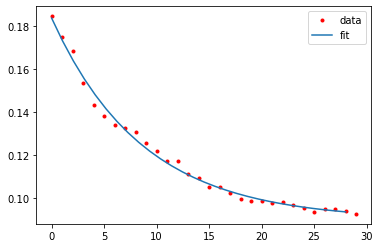

In [8]:
#This box makes the datafile open2, which is the second opening



WTopen2 = df[(df["Time [m]"] > 80) & (df['Time [m]']<=110)][["Time [m]","WT1"]]

#adding a column with new values from 0-72
WTopen2['time2'] = WTopen2["Time [m]"] - WTopen2.iat[0,0]


print(WTopen2)


WTpopt2, WTpcov2 = curve_fit(decay, WTopen2['time2'], WTopen2['WT1'])

#make sigmoidal curve 2

fig7 = plt.figure()
ax7=fig7.add_subplot(1,1,1)
                         

ax7.plot(WTopen2['time2'], WTopen2['WT1'], ".", color='r', label="data")

WTfit2x = np.linspace(0, 28, 28)
WTfit2y = decay(WTfit2x, *WTpopt2)


ax7.plot(WTfit2x, WTfit2y, label='fit')

plt.legend(loc='best')


print(popt2[0])



# Getting sums of squares and R squared
WTresiduals2 = WTopen2['WT1']- decay(WTopen2['time2'], *WTpopt2)
WTss_res2 = np.sum(WTresiduals2**2)

WTss_tot2 = np.sum((WTopen2['WT1']-np.mean(WTopen2['WT1']))**2)

WTr_squared2 = 1 - (WTss_res2 / WTss_tot2)

print(WTr_squared2)




     Time [m]       WT1  time3
140     141.0  0.173167    0.0
141     142.0  0.164218    1.0
142     143.0  0.163195    2.0
143     144.0  0.151343    3.0
144     145.0  0.143900    4.0
145     146.0  0.141886    5.0
146     147.0  0.138919    6.0
147     148.0  0.135666    7.0
148     149.0  0.132887    8.0
149     150.0  0.131155    9.0
150     151.0  0.126219   10.0
151     152.0  0.125551   11.0
152     153.0  0.117849   12.0
153     154.0  0.118442   13.0
154     155.0  0.115085   14.0
155     156.0  0.111396   15.0
156     157.0  0.110420   16.0
157     158.0  0.109415   17.0
158     159.0  0.105936   18.0
159     160.0  0.104541   19.0
160     161.0  0.102701   20.0
161     162.0  0.102536   21.0
162     163.0  0.101626   22.0
163     164.0  0.100617   23.0
164     165.0  0.099659   24.0
165     166.0  0.100783   25.0
166     167.0  0.100053   26.0
167     168.0  0.098507   27.0
168     169.0  0.098230   28.0
[0.17208434 0.16515645 0.15880897 0.15299327 0.14766481 0.14278275
 0.

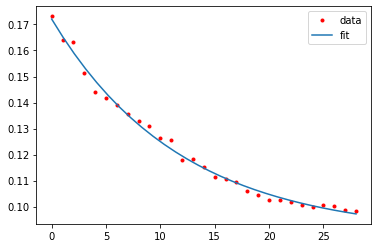

In [9]:
#This box makes the datafile open3, which is the third closing




WTopen3 = df[(df["Time [m]"] > 140) & (df['Time [m]']<=169)][["Time [m]","WT1"]]



#adding a column with new values from 0-72

WTopen3['time3'] = WTopen3['Time [m]'] - WTopen3.iat[0,0]

print(WTopen3)



WTpopt3, WTpcov3 = curve_fit(decay, WTopen3['time3'], WTopen3['WT1'])




#make figure to check the fit

fig8 = plt.figure()
ax8=fig8.add_subplot(1,1,1)

ax8.plot(WTopen3['time3'], WTopen3['WT1'], ".", color='r', label="data")


#extrapolate using the new values
WTfit3x = np.linspace(0, 28, 28)
WTfit3y = decay(WTfit3x, *WTpopt3)



print(WTfit3y)

ax8.plot(WTfit3x, WTfit3y, label='fit')

plt.legend(loc='best')


print(popt1[0])


# Getting sums of squares and R squared
WTresiduals3 = WTopen3['WT1']- decay(WTopen3['time3'], *WTpopt3)
WTss_res3 = np.sum(WTresiduals3**2)

WTss_tot3 = np.sum((WTopen3['WT1']-np.mean(WTopen3['WT1']))**2)

WTr_squared3 = 1 - (WTss_res3 / WTss_tot3)

print(WTpopt3)

In [10]:

#Get half life by dividing 0.693 over b
#these are average half lives


b3 = popt3[1]
b2 = popt2 [1]
b1 = popt1 [1]

hl1 = (0.693/b1) #* 0.693
hl2 = (0.693/b2) #* 0.693
hl3 = (0.693/b3) #* 0.693



WTb3 = WTpopt3[1]
WTb2 = WTpopt2[1]
WTb1 = WTpopt1[1]

WThl1 = (0.693/WTb1) #* 0.693
WThl2 = (0.693/WTb2) #* 0.693
WThl3 = (0.693/WTb3) #* 0.693





In [11]:
#Error bars:
# obs, to get the numbers in the dictionary below I ran the script on each of the data files by themselves, and not as an average value
    
half_lives = {"first":[ 2.349841202132969, 2.9007513459552845, 2.9942294116029657,  3.8166230824195715, 1.8870030632853123],
             "second":[ 5.673845328185432, 5.453499036935923, 6.188227163346327, 7.10037491187164, 3.1659164876133823],
             "third":[14.161530940230422, 7.417735435449002, 13.37989703719997, 15.9046802953797, 6.391180400067319]}    

 
half_livesdf = pd.DataFrame(half_lives, index=np.arange(0,5,1))   

print(half_livesdf['first'].std())


#half_livesdf.loc[len(half_livesdf.index)] = [half_livesdf['first'].std(),half_livesdf['second'].std(),half_livesdf['third'].std()]

std=[half_livesdf['first'].std(),half_livesdf['second'].std(),half_livesdf['third'].std()]
print(std)

print(half_livesdf )
    


0.727508285164463
[0.727508285164463, 1.4589248232529093, 4.2653220090319115]
      first    second      third
0  2.349841  5.673845  14.161531
1  2.900751  5.453499   7.417735
2  2.994229  6.188227  13.379897
3  3.816623  7.100375  15.904680
4  1.887003  3.165916   6.391180


In [12]:
#get the values for the 2 WT files

WThalf_lives = {"first":[3.9766445756525037, 1.9013512146044287],
             "second":[8.70735942055594, 4.242951281349864],
             "third":[11.50732608467651,6.096173896825278]}    
"""

3.9766445756525037 8.70735942055594 11.50732608467651

1.9013512146044287 4.242951281349864 6.096173896825278

"""
WThalf_livesdf = pd.DataFrame(WThalf_lives, index=np.arange(0,2,1))  

print(WThalf_livesdf)

WTstd=[WThalf_livesdf['first'].std(),WThalf_livesdf['second'].std(),WThalf_livesdf['third'].std()]

print(WTstd)


      first    second      third
0  3.976645  8.707359  11.507326
1  1.901351  4.242951   6.096174
[1.467454008548516, 3.156813269217033, 3.8262624060620287]


In [13]:
#Making all of data into one numpy array and normalising eavh column to start at 1 and finish at 0

#Fitdf = pd.DataFrame(fit1y, fit2y, fit3y, WTfit1y, WTfit2y, WTfit3y)

print(len(fit1y), len(fit2y), len(fit3y), len(WTfit1y), len(WTfit2y), len(WTfit3y))

data={'fit1':fit1y,
     'fit2':fit2y,
     'fit3':fit3y,
     'WTfit1':WTfit1y,
     'WTfit2':WTfit2y,
     'WTfit3':WTfit3y}

fitdf = pd.DataFrame(data, index=np.arange(0,28,1))

# substract the (last) smallest number of all of them, then divide them all by the (first) largerst numer


#fitdf['fit1nor']= fit1-"a certain value"

np.array(fitdf)

print(fitdf)

fit_elts = [fit1y, fit2y, fit3y, WTfit1y, WTfit2y, WTfit3y]

def make_array(data):
    return np.array(data)[:,None]

fit_arrays = []
wtfit_arrays = []

for elt in fit_elts:
    last = elt[-1]
    array = make_array(elt)
    array = array - last
    first = array[0,0]
    array = array/first
    fit_arrays.append(array)
to_stack = tuple(fit_arrays)

joined = np.hstack(to_stack)
print(joined)




28 28 28 28 28 28
        fit1      fit2      fit3    WTfit1    WTfit2    WTfit3
0   0.180184  0.156402  0.144205  0.193545  0.183580  0.172084
1   0.157292  0.146158  0.138480  0.172074  0.173022  0.165156
2   0.139626  0.137194  0.133199  0.155247  0.163654  0.158809
3   0.125992  0.129349  0.128327  0.142060  0.155340  0.152993
4   0.115470  0.122483  0.123832  0.131725  0.147963  0.147665
5   0.107349  0.116475  0.119685  0.123625  0.141417  0.142783
6   0.101082  0.111216  0.115860  0.117277  0.135608  0.138310
7   0.096245  0.106615  0.112331  0.112303  0.130453  0.134211
8   0.092513  0.102588  0.109076  0.108404  0.125879  0.130456
9   0.089632  0.099063  0.106072  0.105348  0.121820  0.127016
10  0.087409  0.095979  0.103302  0.102954  0.118219  0.123864
11  0.085693  0.093280  0.100746  0.101077  0.115023  0.120976
12  0.084369  0.090918  0.098388  0.099607  0.112187  0.118330
13  0.083347  0.088850  0.096213  0.098454  0.109671  0.115905
14  0.082559  0.087041  0.094206  0.0

In [14]:
#checking the R squared again


print("r_squared 3 = ", WTr_squared3)
print("r_squared 2 =", WTr_squared2)
print("r_squared 1 =", WTr_squared1)
print("r_squared 3 = ", r_squared3)
print("r_squared 2 =", r_squared2)
print("r_squared 1 =", r_squared1)






r_squared 3 =  0.993114682637012
r_squared 2 = 0.9927043710597758
r_squared 1 = 0.9862221686396176
r_squared 3 =  0.9945148214540335
r_squared 2 = 0.9923904909592725
r_squared 1 = 0.9850670762637128


2.9486992177040183 6.013858882920892 8.213557264246672


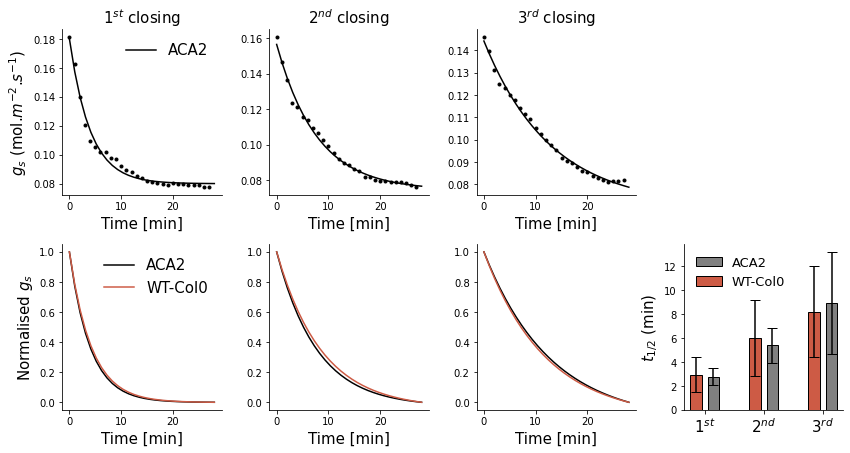

In [15]:
#Plotting all data

fig11, axs = plt.subplots(2, 4, figsize=(14,7))

fig11.subplots_adjust(wspace=0.3, hspace=0.3)

#Plotting REAL overlayed data

axs[0,0].plot(fit1x, fit1y, c="k", label="ACA2" ) 
axs[0,1].plot(fit2x, fit2y, c="k",)
axs[0,2].plot(fit3x, fit3y,c="k", )
axs[0,0].plot(open1['time1'], open1['ACA average'], "k.")
axs[0,1].plot(open2['time2'], open2['ACA average'],"k.")
axs[0,2].plot(open3['time3'], open3['ACA average'], "k.")

axs[0,0].legend(frameon=False, fontsize=15)

axs[1,0].plot(fit1x, joined[:,0], label="ACA2", color="black" )
axs[1,0].plot(WTfit1x, joined[:,3], label="WT-Col0", color="#CD5B45" )

axs[1,1].plot(fit2x, joined[:,1],  label="ACA2", color="black")
axs[1,1].plot(WTfit2x, joined[:,4],  label="Col0", color="#CD5B45")

axs[1,2].plot(fit3x, joined[:,2],  label="ACA2", color="black")
axs[1,2].plot(WTfit3x, joined[:,5],  label="WT-Col0", color="#CD5B45")

axs[0,0].set_title("$1^{st}$ closing", size=15)
axs[0,1].set_title("$2^{nd}$ closing", size=15)
axs[0,2].set_title("$3^{rd}$ closing", size=15)


axs[0,0].set_ylabel("$g_{s}$ (mol.$m^{-2}$.$s^{-1}$)", size=15)
axs[1,0].set_ylabel("Normalised $g_{s}$ ", size=15)

axs[1,0].set_xlabel("Time [min]")


#iterating over all axes and setting the xlabel to time
for ax in axs.flat:
    ax.set_xlabel('Time [min]', size=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
axs[0,3].axis('off')

axs[1,0].legend(frameon=False, fontsize=15)


width = 0.4
    
axs[1,3].bar((np.arange(1,6,2))-width/2, [hl1,hl2,hl3], width, color="gray",edgecolor="black", yerr=std, capsize=5, label="ACA2")
axs[1,3].bar((np.arange(0,6,2))+width/2, [WThl1, WThl2, WThl3], width, color="#CD5B45",edgecolor="black",yerr=WTstd, capsize=5, label="WT-Col0")
axs[1,3].set_xticks([0.5,2.5,4.5], ['$1^{st}$', '$2^{nd}$', '$3^{rd}$'], fontsize=15)

axs[1,3].legend(frameon=False, fontsize=13)

axs[1,3].set_xlabel("", size=13)
axs[1,3].set_xlim(-0.2,5.2)
    

axs[1,3].set_ylabel("$t_{1/2}$ (min)", size=15)
    
#plt.savefig('Graphs/11_01_2022_by_closing.png', dpi=500,  bbox_inches='tight')


print(WThl1, WThl2, WThl3)